## Appendix D: Natural Language Processing on abstracts obtained via medline data 

Using NLTK library in Python 3

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pylab
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import *
import matplotlib.colors as cm

print('NLTK version:%s'%nltk.__version__)

NLTK version:3.2.4


In [2]:
# load dataframe
data = pd.read_csv('combined_df.csv', low_memory= False)
pmiddf = pd.DataFrame(data['PMID'])
data = pd.DataFrame(data.set_index('PMID'))
data.head()

,AB,AD,AID,AU,AUID,BTI,CDAT,CI,CIN,CN,...,SI,SO,SPIN,STAT,TA,TI,TT,UIN,UOF,VI
PMID,,,,,,,,,,,,,,,,,,,,,
26829709,Dysregulation of the hypothalamic-pituitary-ad...,"Department of Psychiatry, University of Califo...","['S0306-4530(16)30007-5 [pii]', '10.1016/j.psy...","['Cheng T', 'Dimitrov S', 'Pruitt C', 'Hong S']",NaN,NaN,NaN,['Published by Elsevier Ltd.'],NaN,NaN,...,NaN,Psychoneuroendocrinology. 2016 Jan 12;66:195-2...,NaN,Publisher,Psychoneuroendocrinology,Glucocorticoid mediated regulation of inflamma...,NaN,NaN,NaN,66
26817126,The article contains the description of a clin...,NaN,NaN,"['Gavrilina NS', 'Sedova GA', 'Kosyura SD', 'F...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Eksp Klin Gastroenterol. 2015;(7):78-84.,NaN,In-Process,Eksp Klin Gastroenterol,[SCLEROUSIS CHOLANGITIS AT THE AUTOIMMUNE PANC...,NaN,NaN,NaN,NaN
26812334,The objective of this experiment was to determ...,NaN,['10.2527/jas.2015-9407 [doi]'],"['Foote AP', 'Hales KE', 'Tait RG', 'Berry ED'...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,J Anim Sci. 2016 Jan;94(1):275-83. doi: 10.252...,NaN,In-Data-Review,J Anim Sci,Relationship of glucocorticoids and hematologi...,NaN,NaN,NaN,94
26810223,PTPN22 gene variation associates with multiple...,"Joslin Diabetes Center, Harvard Medical School...","['jimmunol.1501877 [pii]', '10.4049/jimmunol.1...","['Nowakowska DJ', 'Kissler S']",NaN,NaN,NaN,['Copyright (c) 2016 by The American Associati...,NaN,NaN,...,NaN,J Immunol. 2016 Jan 25. pii: 1501877.,NaN,Publisher,J Immunol,Ptpn22 Modifies Regulatory T Cell Homeostasis ...,NaN,NaN,NaN,NaN
26807874,Melanocortins are a highly conserved family of...,"a Autoimmune and Rare Diseases , Mallinckrodt ...",['10.3109/09273948.2015.1092560 [doi]'],"['Clemson CM', 'Yost J', 'Taylor AW']",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Ocul Immunol Inflamm. 2016 Jan 25:1-11.,NaN,Publisher,Ocul Immunol Inflamm,The Role of Alpha-MSH as a Modulator of Ocular...,NaN,NaN,NaN,NaN


In [56]:
len(data.index)

10510

In [3]:
### Define Preprocessing:
'''
Input: pd series of abstracts
Output: list of abstracts- lowercase, tokanized, stopwords removed 
'''
def preprocess_abstracts(abstract_series):
    stopWords = stopwords.words('english')+['.', '(', ')', '=', ',', '-', '%', ':', 'in']
    tostring = abstract_series.to_string()
    lowercaseData= abstract_series.str.lower()
    splitdata = lowercaseData.apply(word_tokenize)
    stopped = splitdata.apply(lambda x: [item for item in x if item not in stopWords])
    return stopped

In [4]:
processeddata = preprocess_abstracts(data['AB'].apply(str))

In [62]:
processeddata.head()

PMID
26829709    [dysregulation, hypothalamic-pituitary-adrenal...
26817126    [article, contains, description, clinical, cas...
26812334    [objective, experiment, determine, association...
26810223    [ptpn22, gene, variation, associates, multiple...
26807874    [melanocortins, highly, conserved, family, pep...
Name: AB, dtype: object

In [63]:
# to join all abstracts

allabstracts = [x for x in data['AB'].apply(str).str.lower()]
joinedText = '\n'.join(allabstracts)

## Word Frequency  in Abstracts

In [64]:
def abstract_word_frequency(preprocessed_data):
    wordFrequency = preprocessed_data.apply(nltk.FreqDist)
    return wordFrequency

def stemming_words(preprocessed_data):
    st= LancasterStemmer()
    stemmedWords= preprocessed_data.apply(lambda x:[st.stem(item) for item in x])
    return stemmedWords

In [65]:
import nltk
# word frequency

wordFrequency = pd.DataFrame(processeddata.apply(nltk.FreqDist))

In [66]:
newdata = pd.DataFrame(d for idx, d in wordFrequency['AB'].items())

In [67]:
freqCounts = newdata.sum(axis = 0)

In [68]:
freqCounts = freqCounts.sort_values(ascending = False)

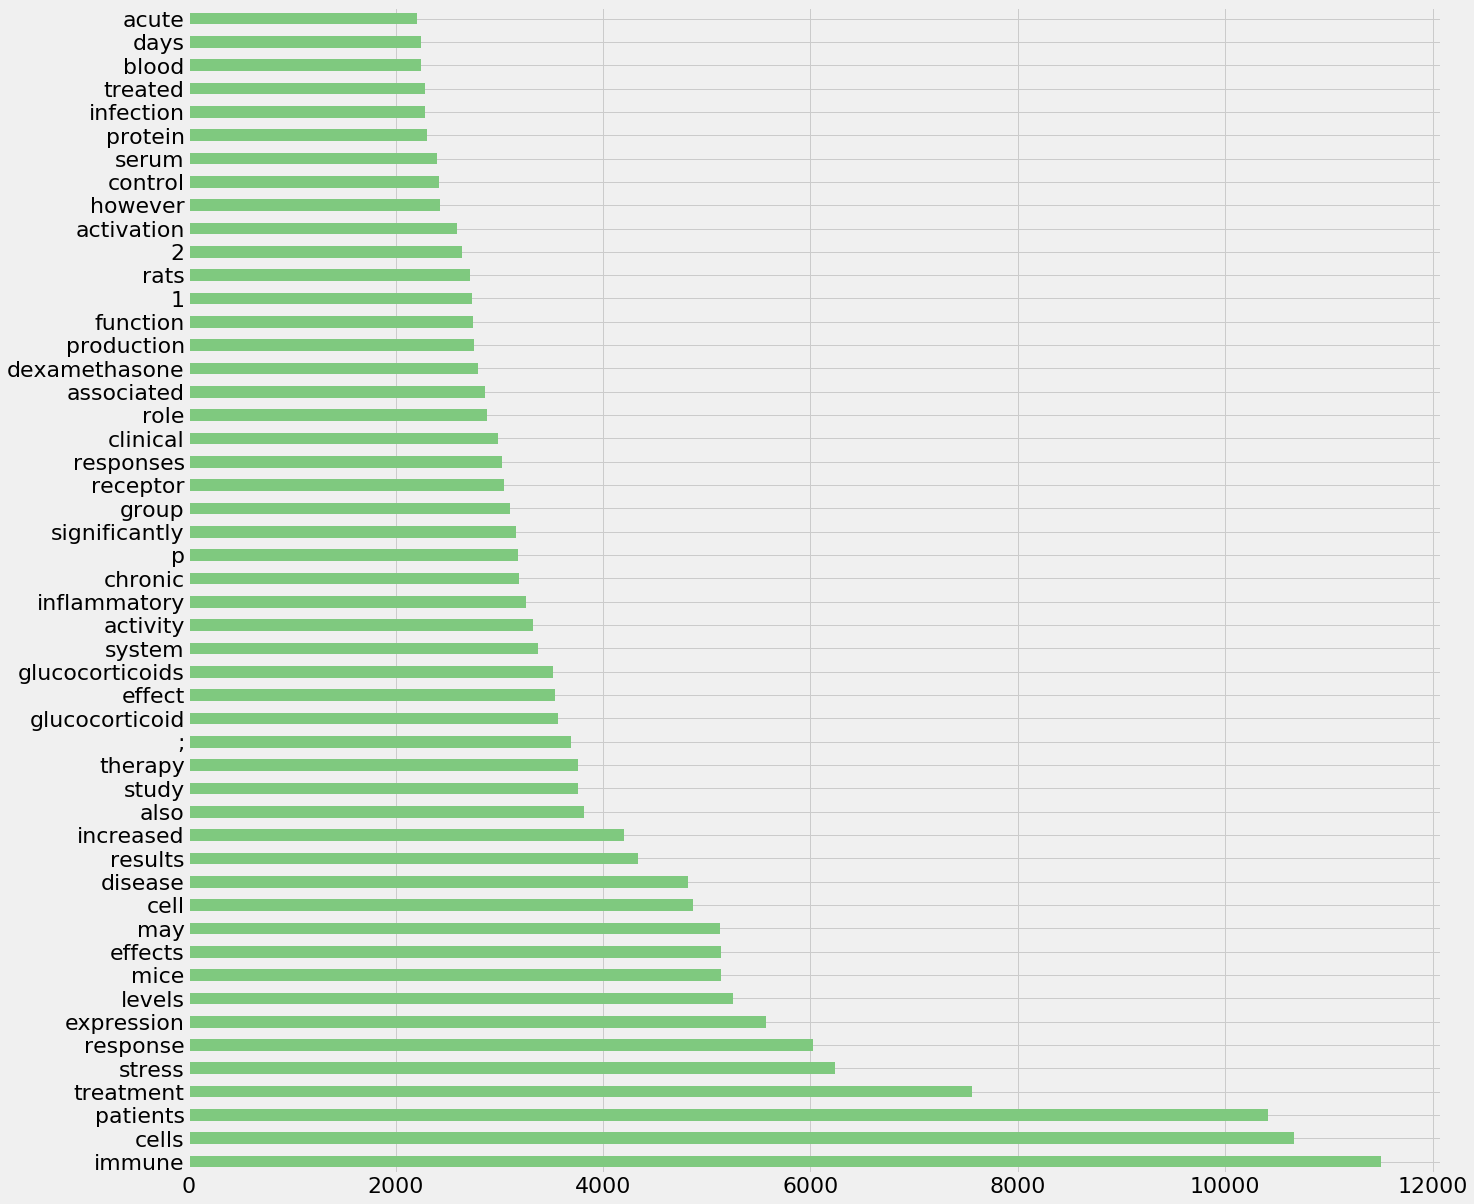

In [74]:
plt.figure(figsize = (15,10))
freqCounts[:50].plot(kind = 'barh', figsize = (20,20), colormap= 'Accent', fontsize =22)
plt.savefig('abstractwordFreq.png', dpi=300, bbox_inches = 'tight')

## Stemming vs Lemmatization - FreqDist

In [75]:
stemmedDF= stemming_words(processeddata)
stemmedDF.head()

PMID
26829709    [dysreg, hypothalamic-pituitary-adrenal, hpa, ...
26817126    [artic, contain, describ, clin, cas, paty, p.,...
26812334    [object, expery, determin, assocy, glucocortic...
26810223    [ptpn22, gen, vary, assocy, multipl, autoimmun...
26807874    [melanocortin, high, conserv, famy, peptid, re...
Name: AB, dtype: object

In [76]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
lemmatizedAB = processeddata.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [78]:
lemmatizedWF = pd.DataFrame(lemmatizedAB.apply(nltk.FreqDist))
unpacked_lemmatizedWF =pd.DataFrame(d for idx, d in lemmatizedWF['AB'].items())

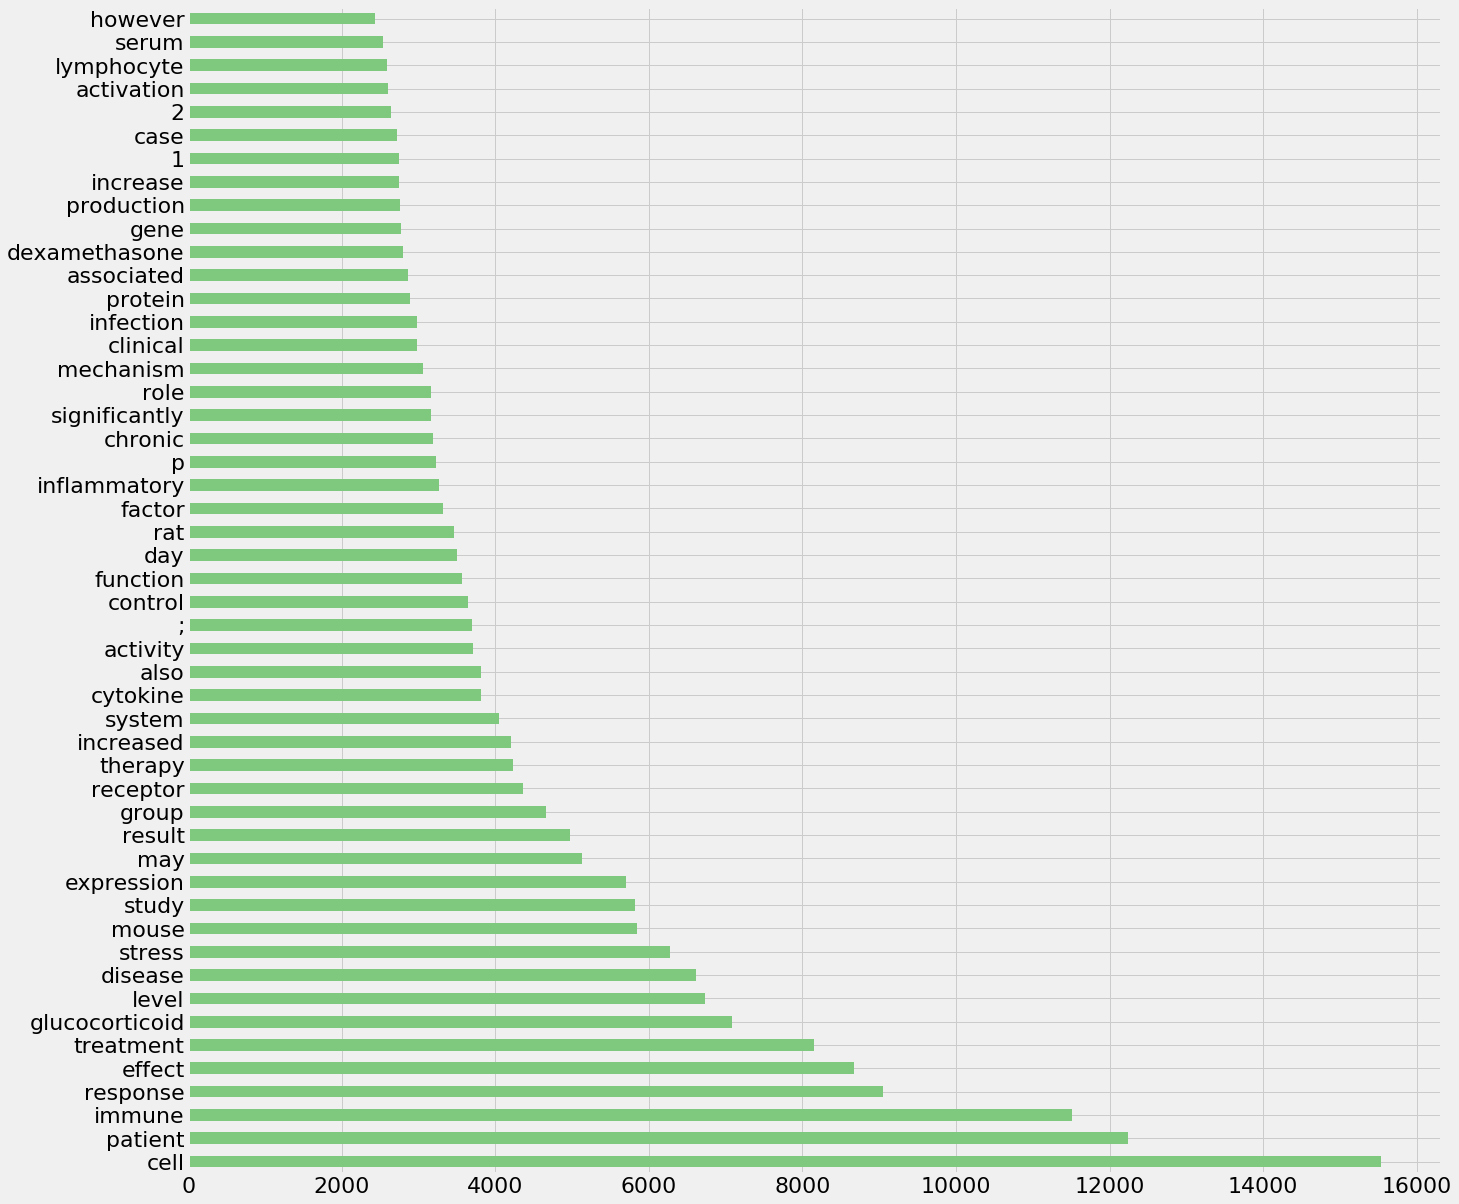

In [80]:
lemmatizedFreqCounts = unpacked_lemmatizedWF.sum(axis = 0)
lemmatizedFreqCounts=lemmatizedFreqCounts.sort_values(ascending= False)
plt.figure(figsize = (15,10))
lemmatizedFreqCounts[:50].plot(kind = 'barh', figsize = (20,20), colormap= 'Accent', fontsize =22)
plt.savefig('lemmatizedFreqDist.png', dpi=300, bbox_inches = 'tight')

In [82]:
from nltk.stem import *
st = LancasterStemmer()

stemmedAB = processeddata.apply(lambda x: [st.stem(word) for word in x])
stemmedWF = pd.DataFrame(stemmedAB.apply(nltk.FreqDist))
unpacked_stemmedWF = pd.DataFrame(d for idx, d in stemmedWF['AB'].items())


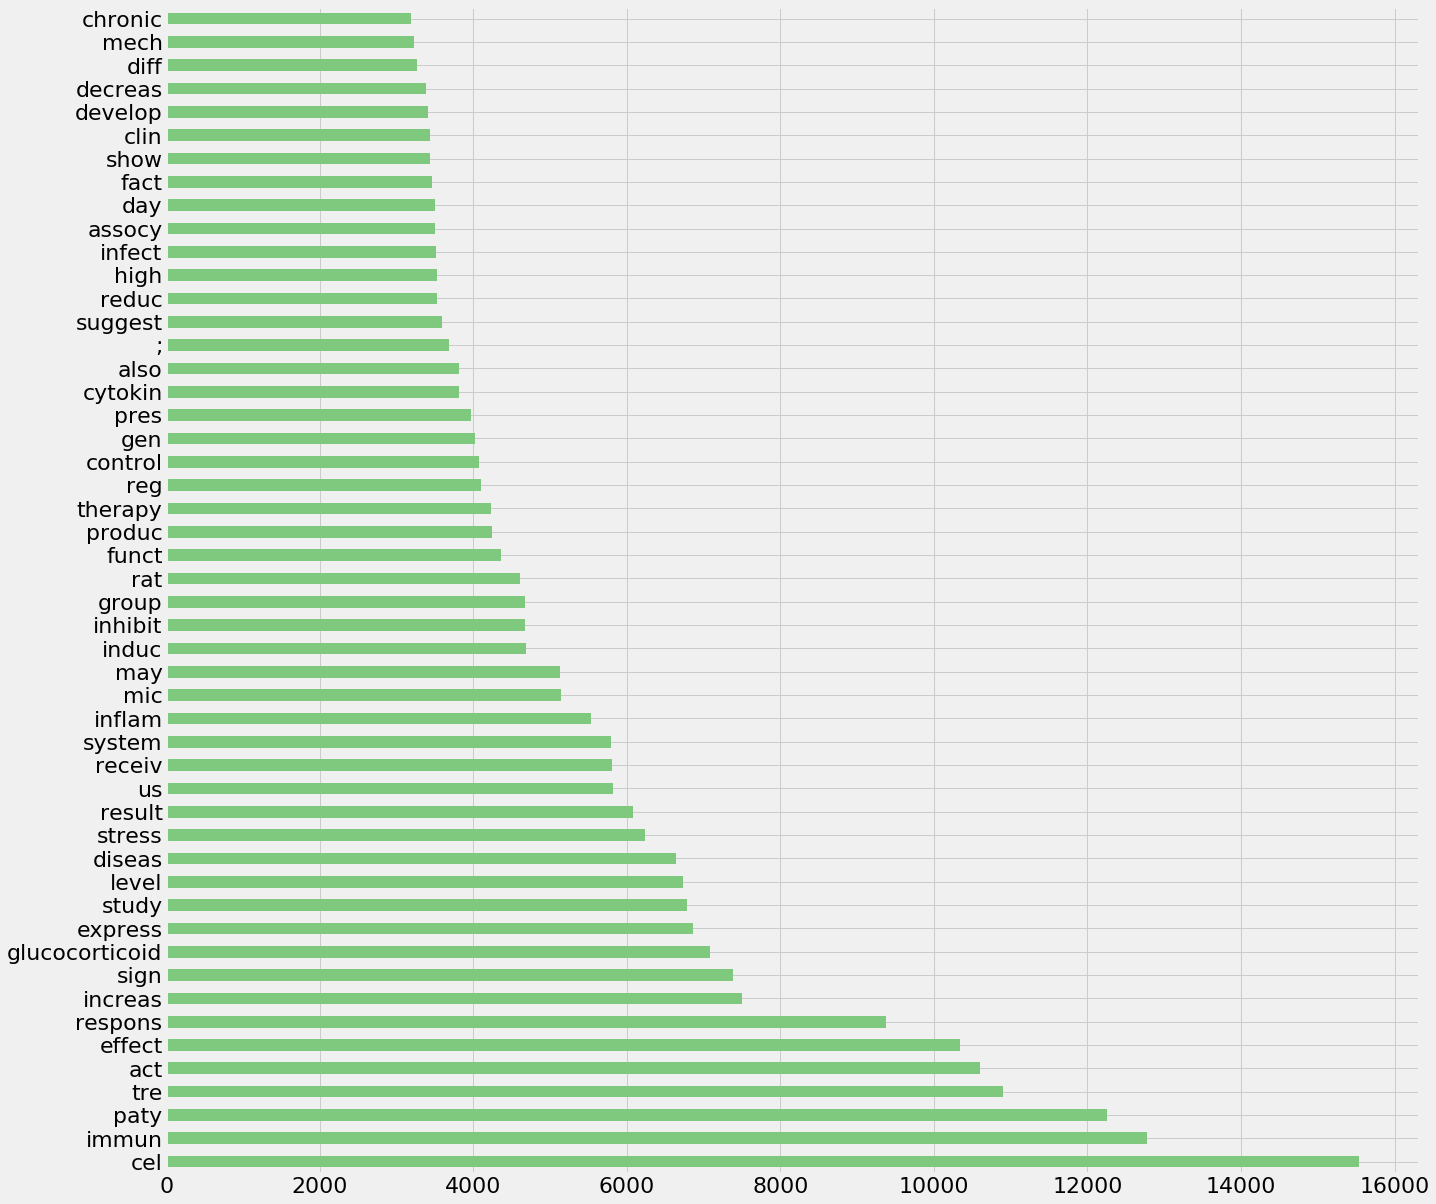

In [83]:
stemmedFreqCounts = unpacked_stemmedWF.sum(axis = 0)
stemmedFreqCounts = stemmedFreqCounts.sort_values(ascending= False)
plt.figure(figsize = (15,10))
stemmedFreqCounts[:50].plot(kind = 'barh',figsize = (20,20), colormap= 'Accent', fontsize =22)
plt.savefig('stemmedFreqDist.png', dpi= 300, bbox_inches = 'tight')

## Most common Nouns 

In [84]:
def findtags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in tagged_text
                                  if tag.startswith(tag_prefix))
    return dict((tag, cfd[tag].most_common(5)) for tag in cfd.conditions())

In [85]:
#findNN = pd.DataFrame(tagged.apply(lambda x: findtags('NN', x)))

def unpackseries(words):
    for tag in sorted(words):
        return(tag, words[tag])

#new = findNN['AB'].apply(lambda x: unpackseries(x))       
#findNN['AB'].apply(lambda x: x.get('NNS'))

In [86]:
{'NNS': [('factors', 3), ('compounds', 2), ('treatments', 2), ('designs', 1), ('aspects', 1)], 
 'NN': [('ms', 5), ('treatment', 3), ('development', 2), ('disease', 2), ('chain', 1)]}

{'NN': [('ms', 5),
  ('treatment', 3),
  ('development', 2),
  ('disease', 2),
  ('chain', 1)],
 'NNS': [('factors', 3),
  ('compounds', 2),
  ('treatments', 2),
  ('designs', 1),
  ('aspects', 1)]}

In [87]:
## soup data
tokenedsoup = [word_tokenize(x) for x in allabstracts]
taggedsoup = [nltk.pos_tag(x) for x in tokenedsoup]

In [88]:
NNtaggedsoup = [findtags('NN', x) for x in taggedsoup]

In [89]:
from collections import Counter
NNtaggedsoupdf = pd.DataFrame(NNtaggedsoup)
NNonly = NNtaggedsoupdf['NN'].tolist()
NNPonly = NNtaggedsoupdf['NNP'].tolist()
NNPSonly = NNtaggedsoupdf['NNPS'].tolist()
NNSonly = NNtaggedsoupdf['NNS'].tolist()

nounsonly = NNSonly + NNPSonly + NNSonly  + NNPonly

In [90]:
NNonlydict = [dict(x) for x in NNonly]
count = Counter()
for d in NNonlydict:
    count+= Counter(d)
nouncounts = pd.Series(count)

In [91]:
NNonlydict[:5]

[{'bmi': 5, 'comir': 8, 'depression': 5, 'mood': 4, 'obesity': 7},
 {'aip': 3, 'case': 2, 'g/l': 3, 'pancreas': 3, 'pancreatitis': 2},
 {'adg': 6, 'analysis': 4, 'corticosterone': 7, 'cortisol': 5, 'dmi': 9},
 {'cell': 8, 'gitr': 5, 'increase': 3, 'ptpn22': 4, 'treg': 10},
 {'family': 1,
  'homeostasis': 1,
  'inflammation': 2,
  'melanocortin': 3,
  'role': 2}]

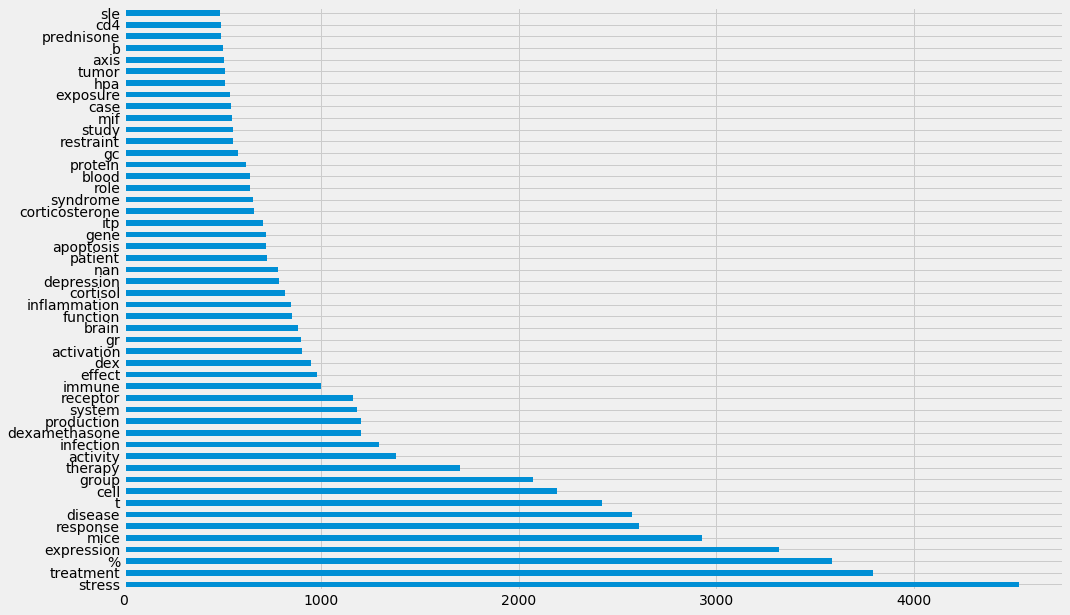

In [92]:
nouncounts= nouncounts.sort_values(ascending = False)
plt.figure(figsize=(15,10))
nouncounts[:50].plot(kind = 'barh')
#pylab.savefig('nounOnlyfreqdist.png')

## Noun Trends

In [93]:
NNtaggedsoupdf  =  pd.DataFrame(NNtaggedsoup)
#join PMID to Nouns
nounsDF = pmiddf.join(NNtaggedsoupdf).set_index('PMID')
nounsDF.head()

,NN,NNP,NNPS,NNS
PMID,,,,
26829709,"[(comir, 8), (obesity, 7), (depression, 5), (b...","[(<, 2)]",NaN,"[(conditions, 2), (analyses, 2), (findings, 2)..."
26817126,"[(aip, 3), (g/l, 3), (pancreas, 3), (case, 2),...",NaN,NaN,"[(times, 2), (years, 1), (hospitals, 1), (orga..."
26812334,"[(dmi, 9), (corticosterone, 7), (adg, 6), (cor...","[(<, 3), (>, 1)]",NaN,"[(heifers, 8), (steers, 5), (samples, 2), (tra..."
26810223,"[(treg, 10), (cell, 8), (gitr, 5), (ptpn22, 4)...",NaN,NaN,"[(cells, 5), (associates, 1), (diseases, 1), (..."
26807874,"[(melanocortin, 3), (role, 2), (inflammation, ...",NaN,NaN,"[(melanocortins, 4), (peptides, 2), (receptors..."


In [94]:
#import fulldataset
fulldata = pd.read_csv('combined_df.csv', low_memory =  False).set_index('PMID')

#Get dates
datedata = fulldata['DA'].apply(lambda x: pd.to_datetime(str(x), format = '%Y%m%d'))
#set dates to YYYYmm
datedata = pd.DataFrame(datedata.apply(lambda x: int(100*x.year + x.month)))
datedata = pd.DataFrame(datedata['DA'].apply(lambda x: pd.to_datetime(str(x), format = '%Y%m')))
#join dates to DF
#datesplusnouns = datedata.join(nounsDF)

In [95]:
def convert_to_dict(item):
    if type(item) is not float:
        return dict(item)
    else:
        return({'NA': 0})
def count_my_words(entry):
    c = Counter()
    for word in entry:
        c += Counter(word)
        return c

#temp =temp['NNP'].apply(lambda x: convert_to_dict(x))
#datesplusnouns['NNPS'].apply(lambda x: convert_to_dict(x))
#datesplusnouns['NNS'].apply(lambda x: convert_to_dict(x))

In [96]:
datesplusnouns = pd.DataFrame(nounsDF['NN'].apply(lambda x: convert_to_dict(x)))
datesplusnouns = datesplusnouns.join(datedata)
datesplusnouns = datesplusnouns.reset_index()
datesplusnouns.head()

,PMID,NN,DA
0,777,{'nan': 1},1976-02-01
1,1639,"{'panarteritis': 3, 'autopsy': 2, 'year': 2, '...",1976-04-01
2,17412,"{'pneumocystis': 4, 'pneumonia': 2, 'tissue': ...",1977-07-01
3,26522,"{'process': 2, 'vasculitis': 1, 'syndrome': 1,...",1978-08-01
4,38306,"{'exudation': 6, 'blood': 4, 'flow': 4, 'react...",1979-10-01


In [97]:
allunpacked = pd.concat([pd.DataFrame(d for idx, d in datesplusnouns['NN'].items()), datesplusnouns['DA']], axis =1 )

In [219]:
## select top 8 and control (p)

top5words = allunpacked[['p', 'stress', 'corticosterone', 'dexamethasone', 'cytokine','inflammasome' ,'DA']]

In [322]:
top5words = allunpacked[['restraint', 'behavior', 'lps', 'shock', 'defeat', 'cms', 'cus', 'swim','DA']]

In [328]:
top5summ

Forced Swim                      14.0
Chronic Unpredictable Stress     91.0
Chronic Mild Stress             121.0
Social Defeat                   137.0
Inescapable Shock               142.0
lps                             379.0
Behavior                        407.0
Restraint Stress                571.0
dtype: float64

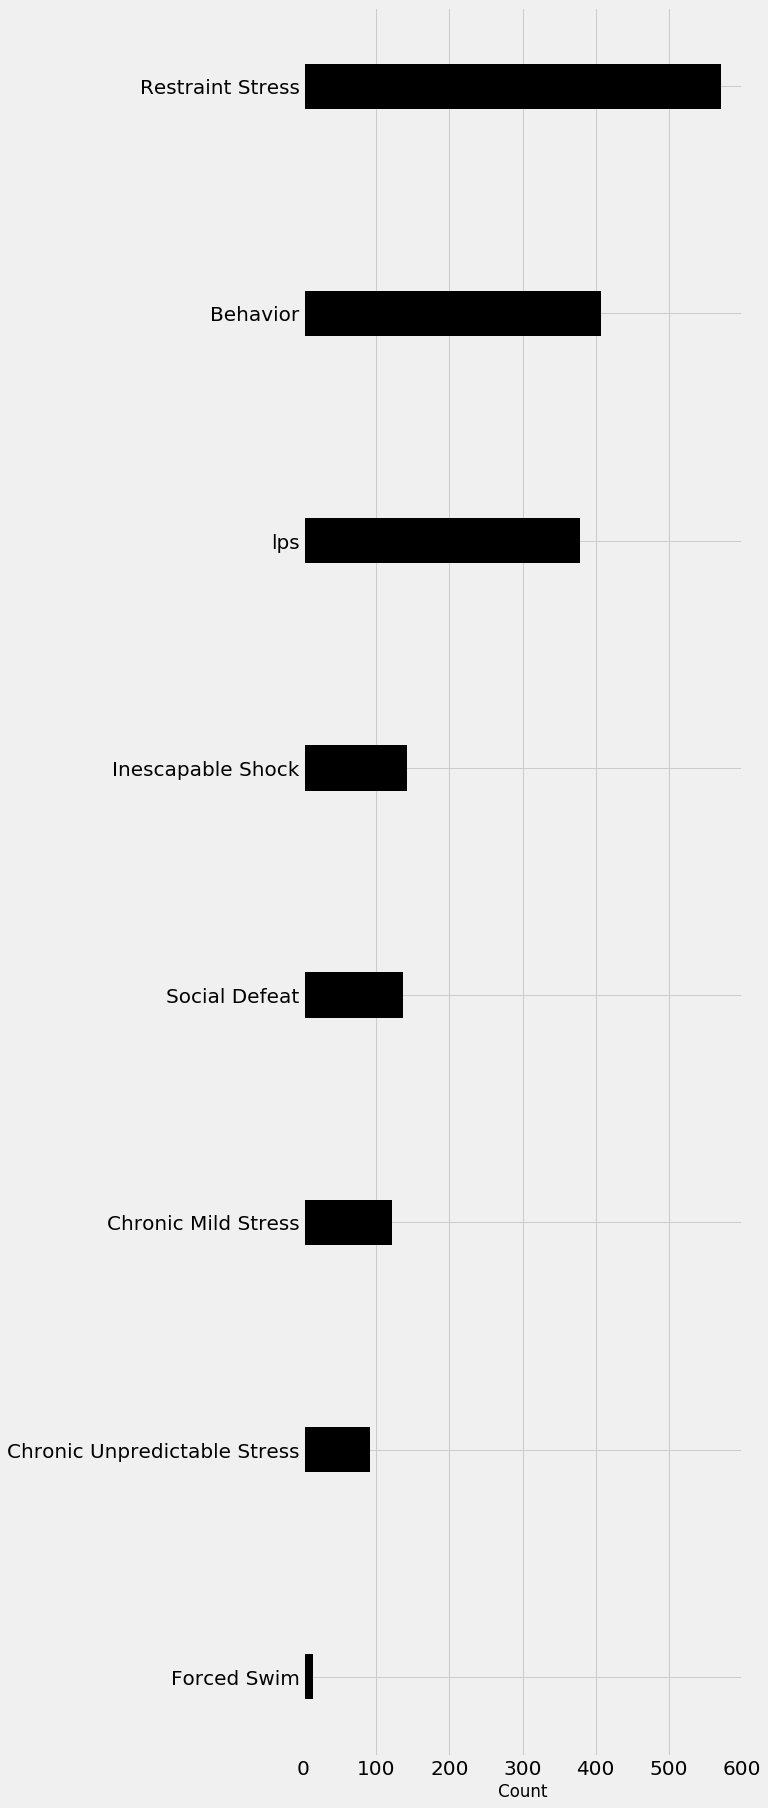

In [324]:

top5words = top5words.rename(columns = {'restraint':'Restraint Stress', 
                             'behavior': 'Behavior', 
                             'shock':'Inescapable Shock', 
                             'defeat': 'Social Defeat', 
                             'cms': 'Chronic Mild Stress', 
                             'cus':'Chronic Unpredictable Stress',
                            'swim': 'Forced Swim'})
label = ['Restraint Stress', 'Behavior', 'Inescapable Shock', 'Chronic Mild Stress', 'Chronic Unpredictable Stress', 'Forced Swim']
top5summ = top5words.sum()
top5summ= top5summ.sort_values()
summplot= top5summ.plot(kind = 'barh',colormap = 'gray', figsize = (7,30), fontsize = (20), width = 0.2)
summplot.set_xlabel('Count')
#summplot.set_yticklabels(labels = label, horizontalalignment = 'right')
plt.savefig('Behav_model.png', dpi = 300, bbox_inches = 'tight')


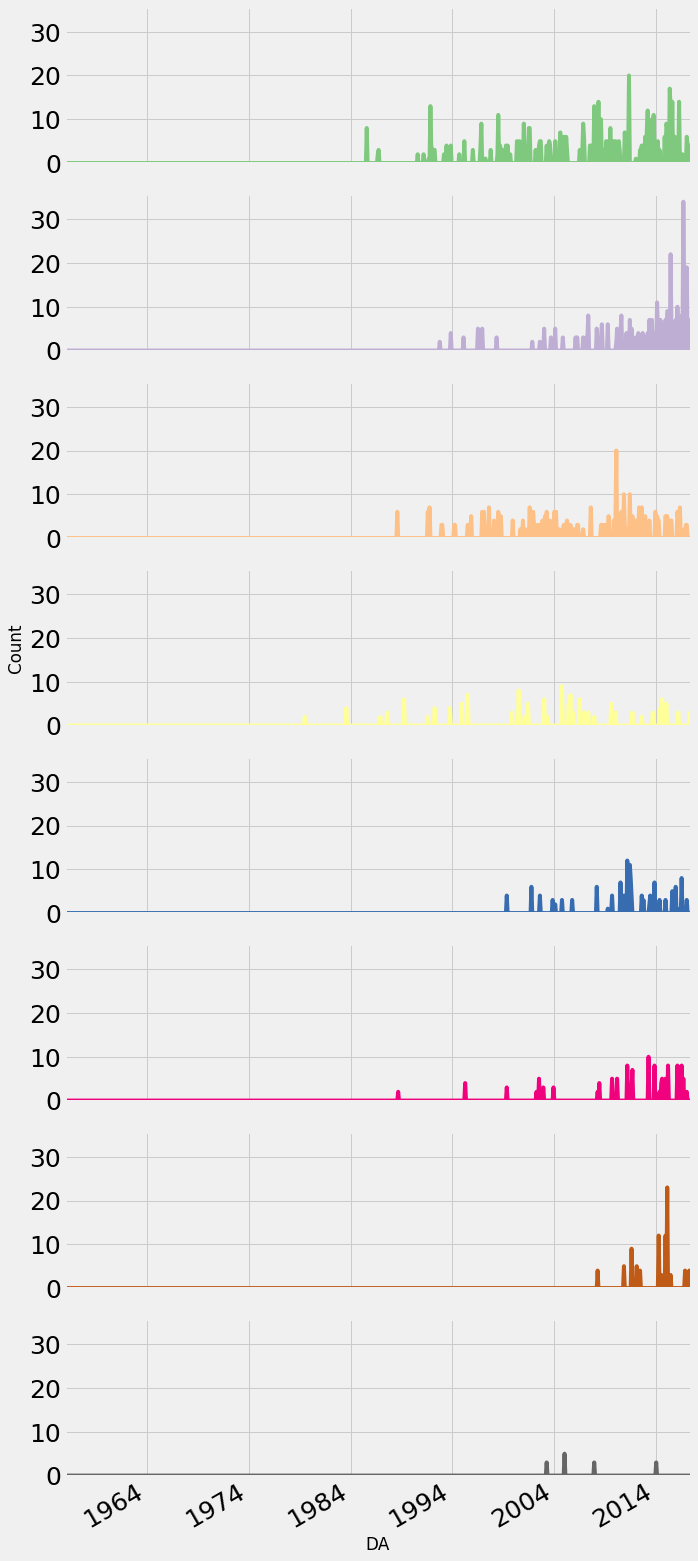

In [327]:
trending5 = top5words.groupby('DA').agg(np.sum)
plt.figure(figsize = (25,10))
#plt.plot(trending5, 'o')
trendplot = trending5.plot(kind = 'area',subplots= True, figsize =(10,30), sharey=True, fontsize= 25, legend = False, colormap="Accent")
trendplot[6].set_xlabel('Publication Date')
trendplot[3].set_ylabel('Count')

#plt.legend(trending5.columns, loc ='best')
plt.savefig('trendspernoun.png', bbox_inches='tight', dpi=300)

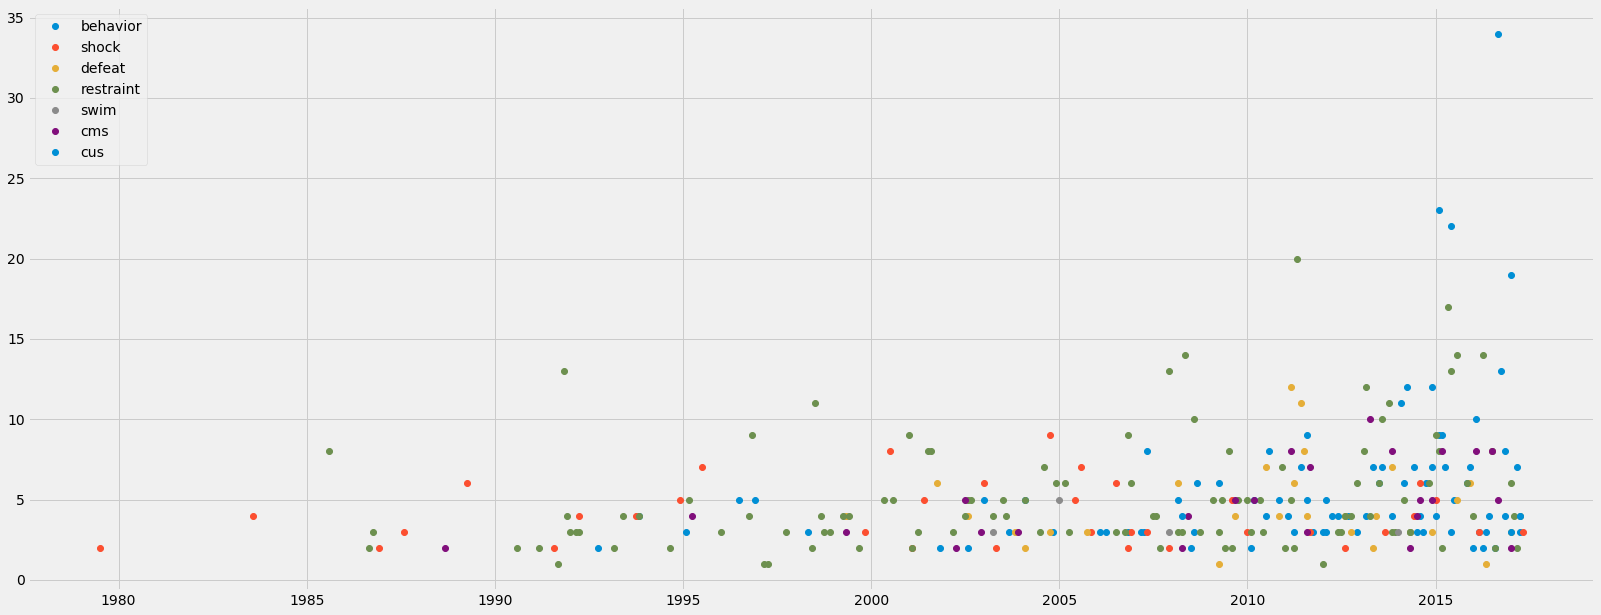

In [108]:
trending5 = top5words.groupby('DA').agg(np.sum)
plt.figure(figsize = (25,10))
plt.plot(trending5, 'o')
#trending5.plot(kind = 'area',subplots= True, figsize =(25,30), sharey=True)
#plt.title('Trending words')
plt.legend(trending5.columns, loc ='best')
#pylab.savefig('trends.png',bbox_inches='tight' )

## Commonly co-occurring words

In [113]:
def get_all_phases_containing_tar_wrd(target_word, tar_passage, left_margin = 10, right_margin = 10):
    """
        Function to get all the phases that contain the target word in a text/passage tar_passage.
        Workaround to save the output given by nltk Concordance function
         
        str target_word, str tar_passage int left_margin int right_margin --> list of str
        left_margin and right_margin allocate the number of words/pununciation before and after target word
        Left margin will take note of the beginning of the text
    """
    # Source: https://simplypython.wordpress.com/2014/03/14/saving-output-of-nltk-text-concordance/
    ## Create list of tokens using nltk function
    tokens = nltk.word_tokenize(tar_passage)
     
    ## Create the text of tokens
    text = nltk.Text(tokens)
 
    ## Collect all the index or offset position of the target word
    c = nltk.ConcordanceIndex(text.tokens, key = lambda s: s.lower())
 
    ## Collect the range of the words that is within the target word by using text.tokens[start;end].
    ## The map function is use so that when the offset position - the target range < 0, it will be default to zero
    concordance_txt = ([text.tokens[list(map(lambda x: x-5 if (x-left_margin)>0 else 0, [offset]))[0]:offset+right_margin]
                        for offset in c.offsets(target_word)])                         
    ## join the sentences for each of the target phrase and return it
    return [''.join([x+' ' for x in con_sub]) for con_sub in concordance_txt]

In [114]:
import csv

def csv_writer(writelist,filename):
    newseries = pd.Series(writelist)
    newseries.to_csv(filename)

In [115]:
concord2 = get_all_phases_containing_tar_wrd('increase', joinedText)


In [127]:
concord2[:10]

['of abdominal organs showed diffusion increase pancreas with a peripheral hypointensive rim , local stenosis ',
 'but the mechanism driving this increase is unknown . in this study , we show ',
 'of ptpn22 caused a concomitant increase in the proportion of cd44hicd62llo effector treg cells , ',
 'central treg cells . the increase in treg cell numbers , but not their differentiation ',
 'immune challenge exhibited a relative increase from the first to the second round of indoor ',
 'adrenalectomised asthmatic rats attenuated the increase in rl and eosinophil count in both asthmatic models ',
 'alarin restored the ucms-induced an increase in the levels of the pro-inflammatory cytokines interleukin ( ',
 'in the following way : increase in th inos expression -- > increase in the ',
 'th inos expression -- > increase in the no production -- > increase in the ',
 'the no production -- > increase in the sgc activity -- > increase in intracellular ']

In [117]:
csv_writer(concord2, 'phasescontaining-increasing.csv')

In [119]:
concord_decrease = get_all_phases_containing_tar_wrd('decrease', joinedText)

In [120]:
csv_writer(concord_decrease, 'phasescontaining-decrease.csv')

In [121]:
# for associate|associated |association
concord_associate = get_all_phases_containing_tar_wrd('associate', joinedText)
concord_associated = get_all_phases_containing_tar_wrd('associated', joinedText)
concord_association = get_all_phases_containing_tar_wrd('association', joinedText)

concord_total_associat = concord_associate + concord_associated + concord_association

In [122]:
csv_writer(concord_total_associat, 'phasescontaining-associate.csv')

## n-grams

In [123]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = processeddata.apply(lambda x: BigramCollocationFinder.from_words(x))

In [124]:
# Naive bi-grams
bigram = finder.apply(lambda df: df.nbest(bigram_measures.pmi, 20))
# Naive tri-grams
Trifinder = processeddata.apply(lambda x: TrigramCollocationFinder.from_words(x))
trigram = Trifinder.apply(lambda df: df.nbest(trigram_measures.pmi, 20))

In [126]:
# token all soup
stopWords = stopwords.words('english')+['.', '(', ')', '=', ',', '-', '%', ':', 'in']
tokendata = word_tokenize(joinedText)
stoppeddata = [x for x in joinedText if x not in stopWords]

In [127]:
#stem text
st= LancasterStemmer()
stemmedWords= [st.stem(item) for item in stoppeddata]

In [129]:
# increase N-grams
tokenincrease = [word_tokenize(x) for x in concord2]
stopincrase= []
for item in tokenincrease:
    for word in item:
        if word not in stopWords:
            stopincrase.append(word)

In [130]:
#trigram increase
increaseTrigram = [TrigramCollocationFinder.from_words(stopincrase)]
increaseTrigramcounts =  [x.nbest(trigram_measures.raw_freq, 30) for x in increaseTrigram]

In [131]:
increaseTrigramcounts

[[('increase', 'platelet', 'count'),
  ('p', '<', '0.05'),
  ('increase', 'plasma', 'corticosterone'),
  ('increase', 'serum', 'corticosterone'),
  ('caused', 'significant', 'increase'),
  ('increase', 'corticosterone', 'levels'),
  ('showed', 'significant', 'increase'),
  ('associated', 'significant', 'increase'),
  ('resulted', 'significant', 'increase'),
  ('increase', 'p', '<'),
  ('induced', 'significant', 'increase'),
  ('produced', 'significant', 'increase'),
  ('increase', 'lipid', 'peroxidation'),
  ('accompanied', 'significant', 'increase'),
  ('increase', 'plasma', 'levels'),
  ('p', '<', '0.001'),
  ('plasma', 'corticosterone', 'levels'),
  ('significant', 'increase', 'serum'),
  ('--', '>', 'increase'),
  ('[', 'ca2+', ']'),
  ('increase', 'vascular', 'permeability'),
  ('led', 'significant', 'increase'),
  ('marked', 'increase', 'plasma'),
  ('may', 'increase', 'risk'),
  ('significant', 'increase', 'number'),
  ('stress', 'induced', 'increase'),
  ('caused', 'marked', 'i

In [132]:
# decrease N-grams
tokenasso = [word_tokenize(x) for x in concord_total_associat]
stopasso= []
for item in tokenasso:
    for word in item:
        if word not in stopWords:
            stopasso.append(word)

In [133]:
#trigram assoc
assoTrigram = [TrigramCollocationFinder.from_words(stopasso)]
assoTrigramcounts =  [x.nbest(trigram_measures.raw_freq, 30) for x in assoTrigram]
assoTrigramcounts

[[('associated', 'increased', 'risk'),
  ('chronic', 'stress', 'associated'),
  ('immune', 'response', 'associated'),
  ('psychological', 'stress', 'associated'),
  ('side', 'effects', 'associated'),
  ('systemic', 'lupus', 'erythematosus'),
  ('associated', 'significant', 'increase'),
  ('crohn', "'s", 'disease'),
  ('lupus', 'erythematosus', 'sle'),
  ('associated', 'autoimmune', 'diseases'),
  ('associated', 'increased', 'levels'),
  ('gene', 'expression', 'associated'),
  ('associated', 'increased', 'incidence'),
  ('associated', 'significantly', 'increased'),
  ('defect', 'serotonergic', 'function'),
  ('genome-wide', 'association', 'studies'),
  ('immune', 'function', 'associated'),
  ('stress', 'associated', 'increased'),
  ("'s", 'disease', 'associated'),
  ('adverse', 'effects', 'associated'),
  ('also', 'associated', 'increased'),
  ('associated', 'high', 'mortality'),
  ('associated', 'immune', 'system'),
  ('associated', 'impaired', 'immune'),
  ('associated', 'systemic', '

In [134]:
# asssociation N-grams
tokendecrease = [word_tokenize(x) for x in concord_decrease]
stopdecrease= []
for item in tokendecrease:
    for word in item:
        if word not in stopWords:
            stopdecrease.append(word)

In [135]:
#trigram decrease
decraseTrigram = [TrigramCollocationFinder.from_words(stopdecrease)]
decreaseTrigramcounts =  [x.nbest(trigram_measures.raw_freq, 30) for x in decraseTrigram]
decreaseTrigramcounts

[[('resulted', 'significant', 'decrease'),
  ('showed', 'significant', 'decrease'),
  ('p', '<', '0.05'),
  ('caused', 'significant', 'decrease'),
  ('decrease', 'immune', 'response'),
  ('significant', 'decrease', 'number'),
  ('decrease', 'body', 'weight'),
  ('decrease', 'cd4', '+'),
  ('induced', 'significant', 'decrease'),
  ('nk', 'cell', 'activity'),
  ('<', '0.05', 'decrease'),
  ('accompanied', 'significant', 'decrease'),
  ('circulating', 'immune', 'complexes'),
  ('decrease', 'nk', 'cell'),
  ('led', 'significant', 'decrease'),
  ('significant', 'decrease', 'plasma'),
  ('significant', 'decrease', 'proteinuria'),
  ('also', 'found', 'decrease'),
  ('characterized', 'significant', 'decrease'),
  ('crf', 'r2beta', 'mrna'),
  ('decrease', 'cell', 'proliferation'),
  ('decrease', 'crf', 'r2beta'),
  ('decrease', 'cytokine', 'production'),
  ('decrease', 'expression', 'levels'),
  ('decrease', 'food', 'intake'),
  ('decrease', 'ia', 'expression'),
  ('decrease', 'number', 'functi

## Bag of words approach: Term vectorising

    - counts per word per document, turns abstracts into sparse matrix (loses the ability to contextualise)
    
    - good for building a dictionary of terms used

In [136]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [159]:
#stemmeddata= stemming_words(processeddata)
listabstracts= lemmatizedAB.apply(lambda x:' '.join(x)).tolist()

In [160]:
vectorizer = CountVectorizer(analyzer= 'word',
                            tokenizer = None,
                            stop_words= None                             
                            )
datafeatures = vectorizer.fit_transform(listabstracts)
datafeaturesarray = datafeatures.toarray()
datafeatures[:2]

<2x34861 sparse matrix of type '<class 'numpy.int64'>'
	with 291 stored elements in Compressed Sparse Row format>

In [161]:
tfVec = TfidfTransformer()
data_tfidf = tfVec.fit_transform(datafeatures)
data_tfidf= data_tfidf.toarray()
data_tfidf[:2]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [162]:
vocab = vectorizer.get_feature_names()
vecdist= np.sum(datafeaturesarray, axis = 0)
tfidfdist= np.sum(data_tfidf, axis = 0)

In [163]:
vecdata= pd.DataFrame(datafeaturesarray)
vecdata.columns= vocab
vecdata.head()

,00,000,0000,00001,00002297,00003,000035,00005,00009,0001,...,zucker,zuckerman,zusanli,zvad,zygomycetes,zygomycosis,zygote,zygotic,zymography,zymosan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TFIDF: Term Freqency - Inverse Document Frequency

    -  Corrects term frequency by document frequency -- higher weights to terms repeatedly mentioned across documents rather than within documents  ie. mentioning a condition several times per abstract
    
    - Controls for terms which are mainly mentioned many times within a subset of articles

In [200]:
len(tfidf_data)

10510

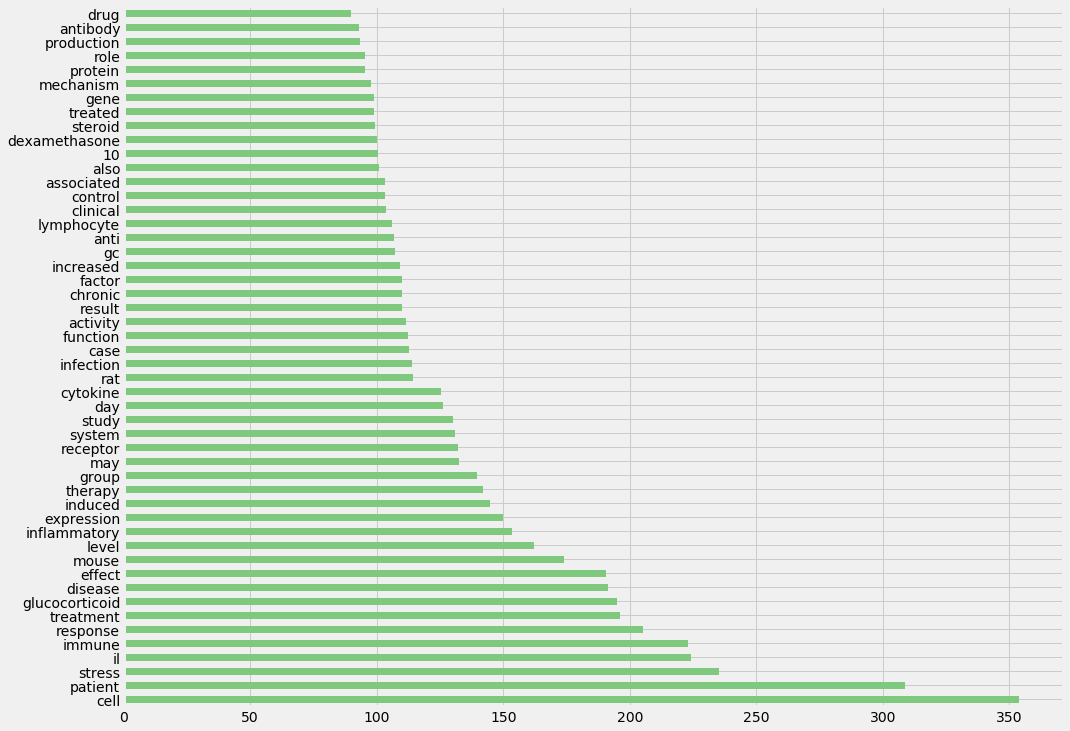

In [166]:
tfidf_data = pd.DataFrame(data_tfidf)
tfidf_data.columns= vocab
summed_tfidf= tfidf_data.sum(axis = 0)
summed_tfidf= summed_tfidf.sort_values(ascending= False)


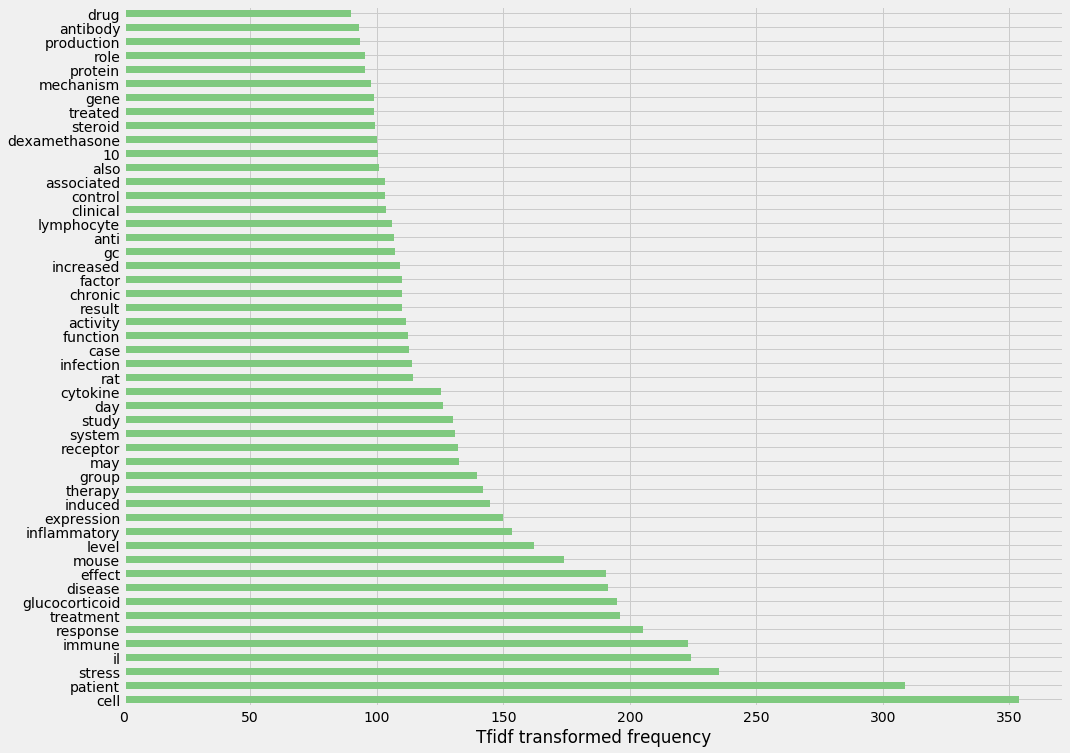

In [190]:
tfidfplot = summed_tfidf[1:51].plot(kind='barh',  figsize = (15,12), colormap = 'Accent')
tfidfplot.set_xlabel('Tfidf transformed frequency')
plt.savefig('tfidfBOW.png', dpi =300, bbox_inches = 'tight')